# Оценка эффективности добавления новой платежной системы с помощью  A/B тестирования

## 1. Постановка бизнес задачи. 

Компания предоставляет своим партнерам (игровым компаниям) сервис для проведения платежей игроков в различных играх. Одним из преимуществ платежного сервиса компании по сравнению с ее конкурентами является большое количество доступных платежных систем, из которых пользователь может выбрать подходящую ему платежную систему.

Продакт менеджер решил добавить еще одну платежную систему, предполагая, что это улучшит пользовательский опыт. 

Пользовательский путь выглядит следующим образом: 

- пользователь (игрок) открывает страницу с перечнем доступных платежных систем (open-list); 

- пользователь выбирает или не выбирает платежную систему из перечня доступных платежных систем (open-payment); 

- пользователь создает заявку на оплату или не создает (create-invoice). 

Иногда поведение пользователей может различаться среди разных сегментов (например, между платформами ui_version или странами). 

Для того, чтобы оценить эффект от добавления новой платежной системы, был проведен A/B тест. Группе A новая платежная система не показывалась, а группе B - показывалась. 

Таким образом, необходимо проанализировать результаты A/B теста и сделать вывод о том, нужно ли раскатывать добавление новой платежной системы для всех игроков. 

## 2. Предварительные рассуждения. 

### 2.1. Введение.

Добавляя еще одну платежную систему, мы предполагаем, что за счет улучшения пользовательского опыта произойдет увеличение трех следующих показателей конверсии в нашей воронке: 

1) Конверсия из пользователей, открывших страницу с перечнем доступных платежных систем (open-list), в пользователей, выбравших платежную систему из множества платежных систем (open-payment): 

Conversion1 = open-payment / open-list 

2) Конверсия из пользователей, выбравших платежную систему из множества платежных систем (open-payment), в пользователей, создавших заявку на оплату (create-invoice): 

Conversion2 = create-invoice / open-payment 

3) Конверсия из пользователей, открывших страницу с перечнем доступных платежных систем (open-list), в пользователей, создавших заявку на оплату (create-invoice): 

Conversion3 = create-invoice / open-list 

По сути, показатель конверсии Conversion3 является основным, но он прямо зависит от двух предыдущих промежуточных показателей конверсии Conversion1 и Conversion2, будучи их произведением. 

Расчет указанных показателей конверсии можно осуществлять, как по всей совокупности статистических данных, так и в разрезе отдельных платформ, стран, платежных систем, игр, игровых действий, источников трафика, когорт игроков, скидок, акций и других группировочных признаков (включая пол игрока, его возраст, используемый браузер, используемую операционную систему, тип населенного пункта игрока). 

Кроме того, добавляя еще одну платежную систему, мы предполагаем, что средний платеж пользователя не уменьшится (т.е. что показатель не ухудшится). 

В определенном смысле можно сказать, что средние показатели конверсий являются таргет метриками, а средние показатели платежей выступают в роли гард метрики. 

Однако в действительности при оценке эффективности добавления новой платежной системы мы будем опираться на экономический эффект, рассчитанный, исходя из условных 5 000 000 открытий страницы с перечнем доступных платежных систем (open-list). 

### 2.2. Проверка статистических гипотез. 

В рамках А/B тестирования последовательно проверяются гипотезы о том, оказывает ли добавление новой платежной системы статистически значимое положительное влияние на три показателя конверсии в необходимом нам размере (т.е. не ниже изначально закладываемого нами в ходе дизайна А/B теста показателя Minimal Detectable Effect, MDE с точки зрения бизнеса компании). 

По итогам А/B тестирования может быть получен один из двух следующих результатов: 

1. Статистически значимое положительное влияние в необходимом нам размере не выявлено (добавление новой платежной системы отменяется). 

2. Статистически значимое положительное влияние в необходимом нам размере выявлено (добавление новой платежной системы утверждается для всех пользователей на постоянной основе). 

Необходимо отметить, что численность пользователей и количество их действий в контрольной и тестовой группах могут различаться плюс дисперсии показателей конверсий также могут быть разными. 

Средние показатели конверсий, по сути, представляют собой вероятность того, что игрок «конвертнется», что можно обозначить как вероятность успеха p. Соответственно, вероятность того, что игрок не «конвертнется», будет равна (1 – p). 

Таким образом, с учетом свойств распределения Бернулли дисперсии показателей конверсий в тестовой и контрольной группах можно рассчитать, как произведение p на (1 – p). 

Размер выборки тестовой или контрольной группы представляет собой количество действий пользователей (т.е. количество событий), которое может не совпадать с исходным количеством отобранных в группу пользователей. Например, один и тот же игрок может несколько раз открыть страницу с перечнем доступных платежных систем, несколько раз выбрать разные платежные системы (или одну платежную систему), после чего сделать одну заявку на оплату (либо суммарно несколько заявок на оплату). 

Поскольку пользователь может совершить действие (в этом случае мы присвоим ему 1) либо не совершить его (в этом случае мы присвоим ему 0), то исходные данные являются дискретными и, по сути, представляют из себя биномиальное распределение. Следовательно, для проверки наших гипотез в части сравнения средних показателей конверсий можно использовать расчет критерия согласия Пирсона (хи-квадрат). Для этого нам потребуется библиотека statsmodels, объект stats.proportion и метод proportions_chisquare. 

В свою очередь, для проверки наших гипотез в части сравнения средних показателей платежей можно использовать такой гибкий статистический метод, как бутстрэп, который в отличие от классических статистических методов позволяет сравнивать не только средние значения показателей в выборках, но и медианные значения и значения перцентилей. Для этого нам потребуется библиотека bootstrapped, метод bootstrap и функция bootstrap_ab. 

### 2.3. Учет возможной миграции пользователей. 

Вместе с тем, необходимо принимать во внимание, что даже если не будет выявлено статистически значимое положительное влияние добавления новой платежной системы на динамику показателей конверсии в необходимом нам размере, то гипотетически может быть вариант миграции (перераспределения) пользователей из действующих платежных систем в новую платежную систему, что в принципе можно рассматривать как определенное улучшение пользовательского опыта. 

Например, новая платежная система по тем или иным причинам удобнее и выгоднее для игроков по сравнению с уже существующими платежными системами. 

### 2.4. Учет интересов бизнеса компании. 

Однако в данном случае также следует учитывать интересы бизнеса компании (издателя игр). Здесь могут быть, условно говоря, три варианта: 

1. Миграция пользователей улучшила показатели бизнеса компании ввиду более выгодных условий сотрудничества компании с новой платежной системой по сравнению с уже существующими платежными системами. 

2. Миграция пользователей, напротив, ухудшила показатели бизнеса компании ввиду менее выгодных условий сотрудничества компании с новой платежной системой. 

3. Миграция пользователей не изменила показатели бизнеса компании ввиду одинаковых условий сотрудничества компании с новой платежной системой и с уже существующими платежными системами. 

Таким образом, в первом случае, когда миграция пользователей в новую платежную систему улучшила бизнес компании, можно все же утвердить добавление новой платежной системы для всех пользователей на постоянной основе, даже несмотря на результаты нашего А/B теста (т.е. даже если сами показатели конверсии останутся на прежнем уровне или увеличатся не в той мере, как мы изначально закладывали в ходе дизайна А/B теста). 

Но, разумеется, если статистически значимое положительное влияние в необходимом нам размере не выявлено, и при этом миграции пользователей в новую платежную систему не произошло, то здесь нужно отменять добавление новой платежной системы и оставлять все как есть. 

### 2.5. Цепочка конверсий в воронке. 

В целом нужно смотреть всю цепочку конверсий в нашей воронке. 

Например, может быть сценарий, при котором произошло улучшение показателя конверсии Conversion1 при одновременном ухудшении показателей конверсии Conversion2 и Conversion3. 

Здесь нужно будет более детально разбираться, почему так происходит, в том смысле, почему пользователи выбирают новую платежную систему из множества платежных систем, но дальше в ней по каким-то причинам не создают заявку на оплату. И, в конечном счете, тогда нужно стараться сделать так, чтобы пользователям было удобно и комфортно совершать платежи в новой платежной системе. 

### 2.6. А/А тест. 

Кроме того, было бы интересно одновременно с А/B тестом дополнительно провести А/А тест с тем, чтобы убедиться в стабильности (однородности) средних показателей конверсий и платежей в разрезе подгрупп внутри нашей контрольной группы пользователей, которым не показывается новая платежная система. 

### 2.7. Можно поменять контрольную и тестовую группы местами. 

Наконец, для большей надежности получаемых выводов можно поменять контрольную и тестовую группы местами, запустить еще один А/B тест и посмотреть, будут ли статистически значимые различия в средних показателях конверсий и платежей. 

Причем здесь может быть три варианта сравнения показателей конверсий и платежей: 

1. Новая контрольная группа и новая тестовая группа. 

2. Новая контрольная группа и старая тестовая группа (это одна и та же выборка). 

3. Новая тестовая группа и старая контрольная группа (это одна и та же выборка). 

### 2.8. Финальный А/B тест. 

Ну и для того, чтобы окончательно убедиться, что показатели конверсий растут в результате добавления новой платежной системы, а не под воздействием других факторов, можно выкатить добавление новой платежной системы не для всей аудитории сразу, а только для 90%. Соответственно, 10% игроков по прежнему не будут видеть новую платежную систему. 

И уже после этого финального А/B теста можно будет принимать окончательное решение о целесообразности добавления новой платежной системы для всех игроков на постоянной основе. 

### 2.9. Другая дорога. 

Плюс вообще можно пойти по другой дороге – например, определить минимальное количество оплат через новую платежную систему (в час или день), которое может быть достаточным для добавления новой платежной системы для всех пользователей на постоянной основе. 

Например, минимальный порог оплат через новую платежную систему может быть установлен в размере не менее 1000 оплат в час. После чего мы смотрим, полученный нами по факту средний показатель оплат в час через новую платежную систему статистически значимо превышает установленный порог (1000 оплат в час) или нет. 

И если да, то далее утверждаем добавление новой платежной системы для всех пользователей на постоянной основе. В противном случае – нет. 

В обоих случаях нужно еще посмотреть средний показатель выборов новой платежной системы в час, чтобы понять, интересна ли пользователям новая платежная система. Ведь, опять же игроки могут вообще не выбирать новую платежную систему и тогда все ясно, а могут, напротив, активно выбирать, но на следующем этапе сталкиваться с какими-либо сложностями и препятствиями. 

## 3. Предварительный анализ исходных данных. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('AB_test_new_payment_system_data.csv')

Данные представляют из себя логи событий за время эксперимента (A/B теста). 

Посмотрим на первые 60 строк исходного датафрейма df. 

In [3]:
df.head(60)

,internal_time,milliseconds,action,user_id,user_country,ui_version,amount,experiment_group
0,2021-12-23 23:21:15.000,2021-12-23 20:19:35.095,open-list,1030926598,BA,desktop,NaN,A
1,2021-12-23 23:21:15.000,2021-12-23 20:19:35.166,open-payment,1030926598,BA,desktop,NaN,A
2,2021-12-23 16:53:45.000,2021-12-23 13:53:44.524,open-list,2257656204,TN,mobile,NaN,A
3,2021-12-23 16:53:17.000,2021-12-23 13:53:16.160,open-list,2257656204,TN,mobile,NaN,A
4,2021-12-23 23:58:53.000,2021-12-23 20:58:56.656,open-list,3011476026,TN,desktop,NaN,A
5,2021-12-23 20:59:30.000,2021-12-23 17:59:20.853,open-payment,2659004949,BA,desktop,NaN,A
6,2021-12-23 20:59:30.000,2021-12-23 17:59:20.775,open-list,2659004949,BA,desktop,NaN,A
7,2021-12-23 18:15:52.000,2021-12-23 15:15:52.552,open-payment,2716266521,TN,desktop,NaN,B
8,2021-12-23 18:15:33.000,2021-12-23 15:15:29.302,open-list,2716266521,TN,desktop,NaN,B
9,2021-12-23 18:16:07.000,2021-12-23 15:16:08.295,create-invoice,2716266521,TN,desktop,18.8,B


В представленной таблице мы видим: 

индексы строк; 

internal_time - дата и время события (в не хронологическом порядке); 

milliseconds - дата и время события в миллисекундах (1 секунда - это 1000 миллисекунд);

action - имя события; 

user_id - ID пользователя; 

user_country - Iso-code страны пользователя; 

ui_version - платформа; 

amount - размер платежа пользователя в долларовом эквиваленте (есть пропущенные значения NaN); 

experiment_group - группа эксперимента. 

Далее посмотрим на следующие 60 строк нашего датафрейма. 

In [4]:
df.loc[60:119] 

,internal_time,milliseconds,action,user_id,user_country,ui_version,amount,experiment_group
60,2021-12-15 15:01:29.000,2021-12-15 12:01:31.813,open-payment,2959010775,TN,desktop,NaN,B
61,2021-12-13 00:09:32.000,2021-12-12 21:09:30.559,open-list,2846934837,BA,desktop,NaN,B
62,2021-12-13 00:09:32.000,2021-12-12 21:09:30.607,open-payment,2846934837,BA,desktop,NaN,B
63,2021-12-23 14:28:37.000,2021-12-23 11:28:38.231,open-list,3143804302,TN,desktop,NaN,B
64,2021-12-23 14:28:37.000,2021-12-23 11:28:38.476,open-payment,3143804302,TN,desktop,NaN,B
65,2021-12-23 15:38:09.000,2021-12-23 12:38:06.670,open-list,659420373,BA,desktop,NaN,B
66,2021-12-23 15:38:09.000,2021-12-23 12:38:06.809,open-payment,659420373,BA,desktop,NaN,B
67,2021-12-23 15:38:24.000,2021-12-23 12:38:21.861,create-invoice,659420373,BA,desktop,14.3,B
68,2021-12-12 14:58:46.000,2021-12-12 11:58:45.946,open-payment,2867835228,TN,mobile,NaN,A
69,2021-12-12 14:58:45.000,2021-12-12 11:58:45.174,open-list,2867835228,TN,mobile,NaN,A


По сравнению с предыдущим срезом датафрейма в этом срезе ничего подозрительного не выявлено. Но для надежности взглянем еще на последние 60 строк. 

In [5]:
df.tail(60)

,internal_time,milliseconds,action,user_id,user_country,ui_version,amount,experiment_group
867376,2021-12-21 13:26:40.000,2021-12-21 10:26:40.184,open-list,1246664741,UA,desktop,NaN,A
867377,2021-12-21 13:27:16.000,2021-12-21 10:27:15.934,create-invoice,1246664741,UA,desktop,9.3,A
867378,2021-12-21 13:26:41.000,2021-12-21 10:26:40.237,open-payment,1246664741,UA,desktop,NaN,A
867379,2021-12-10 20:30:47.000,2021-12-10 17:30:47.145,open-payment,966470738,UA,desktop,NaN,B
867380,2021-12-10 20:31:40.000,2021-12-10 17:31:40.015,open-payment,966470738,UA,desktop,NaN,B
867381,2021-12-10 20:31:40.000,2021-12-10 17:31:40.012,open-list,966470738,UA,desktop,NaN,B
867382,2021-12-10 20:30:46.000,2021-12-10 17:30:47.000,open-list,966470738,UA,desktop,NaN,B
867383,2021-12-10 20:31:02.000,2021-12-10 17:31:02.236,create-invoice,966470738,UA,desktop,10.3,B
867384,2021-12-10 22:27:05.000,2021-12-10 19:27:08.590,open-list,2039410423,UA,desktop,NaN,B
867385,2021-12-10 22:27:05.000,2021-12-10 19:27:08.676,open-payment,2039410423,UA,desktop,NaN,B


Ничего подозрительного не выявлено. При необходимости можно взглянуть на весь датафрейм, используя конструкцию: 

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 

    print(df) 

Далее посмотрим на общую информацию о том, какие данные хранятся в датафрейме. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867436 entries, 0 to 867435
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   internal_time     867436 non-null  object 
 1   milliseconds      867436 non-null  object 
 2   action            867436 non-null  object 
 3   user_id           867436 non-null  int64  
 4   user_country      867436 non-null  object 
 5   ui_version        867436 non-null  object 
 6   amount            133901 non-null  float64
 7   experiment_group  867436 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 52.9+ MB


Датафрейм имеет следующую размерность - 867436 строк (с индексами от 0 до 867435) и 8 столбцов (колонок). 

В столбце с датой и временем события internal_time и в столбце с датой и временем события в миллисекундах milliseconds представлены данные типа object. 

А значит для дальнейшей работы эти столбцы нужно привести к формату datetime. 

In [7]:
df['internal_time'] = pd.to_datetime(df['internal_time']) 
df['milliseconds'] = pd.to_datetime(df['milliseconds']) 

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867436 entries, 0 to 867435
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   internal_time     867436 non-null  datetime64[ns]
 1   milliseconds      867436 non-null  datetime64[ns]
 2   action            867436 non-null  object        
 3   user_id           867436 non-null  int64         
 4   user_country      867436 non-null  object        
 5   ui_version        867436 non-null  object        
 6   amount            133901 non-null  float64       
 7   experiment_group  867436 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 52.9+ MB


Судя по всему, internal_time это внутреннее время компании, а milliseconds - точное время в стране происхождения игрока. 

Посмотрим, есть ли в датафрейме строки с расхождением этих показателей, превышающим 1 сутки. 

In [8]:
import datetime

delta = datetime.timedelta(days = 1, 
                           seconds = 0, 
                           microseconds = 0, 
                           milliseconds = 0, 
                           minutes = 0, 
                           hours = 0, 
                           weeks = 0)

In [9]:
df.loc[(df['internal_time'] -  df['milliseconds'] > delta) | (df['milliseconds'] -  df['internal_time'] > delta)] 

,internal_time,milliseconds,action,user_id,user_country,ui_version,amount,experiment_group


Все хорошо, таких строк нет, можно двигаться дальше. 

Далее посмотрим на пропущенные значения. 

In [10]:
df.isna().sum()

internal_time            0
milliseconds             0
action                   0
user_id                  0
user_country             0
ui_version               0
amount              733535
experiment_group         0
dtype: int64

In [11]:
df.isna().mean()

internal_time       0.000000
milliseconds        0.000000
action              0.000000
user_id             0.000000
user_country        0.000000
ui_version          0.000000
amount              0.845636
experiment_group    0.000000
dtype: float64

Пропуски данных присутствуют только в столбце с размером платежа пользователя amount - 733535 пропущенных значений из общего количества строк в размере 867436, что составляет 84,6% от всех значений в этом столбце. 

Необходимо отметить, что функции агрегации не учитывают ячейки с пропущенными значениями. 

Для завершения предварительного анализа исходных данных посмотрим на основные статистические показатели по столбцам датафрейма. 

In [12]:
df.describe() 

,user_id,amount
count,8.674360e+05,133901.000000
mean,1.949054e+09,12.960733
std,8.889821e+08,4.324663
min,3.302600e+04,5.000000
25%,1.295658e+09,9.500000
50%,2.004412e+09,12.300000
75%,2.735443e+09,16.000000
max,3.165502e+09,25.000000


Общее количество платежей пользователей составляет 133901 платеж. 

Средний размер платежа составляет 13,0 долл. при медиане 12,3 долл. 

In [13]:
df.describe(include = 'all')

<ipython-input-13-74aa2f970831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')
<ipython-input-13-74aa2f970831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,internal_time,milliseconds,action,user_id,user_country,ui_version,amount,experiment_group
count,867436,867436,867436,8.674360e+05,867436,867436,133901.000000,867436
unique,466009,858655,3,NaN,22,2,NaN,2
top,2021-12-19 20:09:27,2021-12-14 08:43:25.304000,open-list,NaN,BR,desktop,NaN,A
freq,12,6,394373,NaN,306664,788201,NaN,434448
first,2021-12-10 12:27:11,2021-12-09 17:10:35.287000,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-24 23:17:22,2021-12-25 02:51:10.234000,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.949054e+09,NaN,NaN,12.960733,NaN
std,NaN,NaN,NaN,8.889821e+08,NaN,NaN,4.324663,NaN
min,NaN,NaN,NaN,3.302600e+04,NaN,NaN,5.000000,NaN
25%,NaN,NaN,NaN,1.295658e+09,NaN,NaN,9.500000,NaN


Если исходить из внутреннего времени компании (столбец internal_time), то A/B тест проводился в декабре 2021 г. на протяжении двух недель - с 2021-12-10 12:27:11 по 2021-12-24 23:17:22. 

За этот период в рамках эксперимента зарегистрировано 867436 действий пользователей. Наиболее часто встречается действие open-list (открытие страницы с перечнем доступных платежных систем) - 394373 действия. 

В A/B тесте участвуют пользователи из 22 уникальных стран. Наибольшее количество действий пользователей зарегистрировано из страны BR (Бразилия) - 306664 действия из общего количества действий пользователей в размере 867436 действий. 

Игроки используют две уникальных платформы - desktop и mobile. Лидером является desktop (788201 действие из общего количества действий пользователей в размере 867436 действий). 

Участники A/B теста разделены на две группы - A и B. В группе A зарегистрировано больше действий участников эксперимента - 434448 действий. Соответственно, в группе B зафиксировано 432988 действий пользователей. 

То есть группы A и B по размеру выборок (т.е. по количеству действий пользователей) являются примерно сопоставимыми. 

Однако далее нужно проверить распределение пользователей по основным сегментам в разрезе двух групп A и B, а именно по странам и платформам. 

## 4. Проверка качества сплитования пользователей для A/B теста. 

Для начала посмотрим, как сами пользователи распределены по группам A и B. 

In [14]:
df.groupby('experiment_group')[['user_id', 'user_country', 'action', 'ui_version']].nunique() 

,user_id,user_country,action,ui_version
experiment_group,,,,
A,74523,22,3,2
B,73667,22,3,2


В группе A зарегистрировано больше уникальных участников эксперимента - 74523 пользователя. Соответственно, в группе B зафиксировано 73667 пользователей. 

Таким образом, группы A и B по количеству уникальных пользователей также являются примерно сопоставимыми. 

Далее посмотрим на распределение пользователей по платформам в разрезе двух групп A и B. 

In [15]:
df.groupby(['ui_version', 'experiment_group'])['user_id'].nunique()

ui_version  experiment_group
desktop     A                   66945
            B                   66103
mobile      A                    7578
            B                    7564
Name: user_id, dtype: int64

Распределение пользователей по платформам в разрезе двух групп A и B также выглядит примерно сопоставимым. 

Посмотрим на распределение пользователей по странам в разрезе двух групп A и B. 

In [16]:
df.groupby(['user_country', 'experiment_group'])['user_id'].nunique()

user_country  experiment_group
BA            A                     227
              B                     250
BG            A                     960
              B                     931
BH            A                     421
              B                     396
BR            A                   28186
              B                   28003
BY            A                     545
              B                     550
EE            A                    1140
              B                    1032
FI            A                    1175
              B                    1289
FR            A                    7279
              B                    7118
GR            A                    1649
              B                    1647
HR            A                     752
              B                     763
HU            A                    1326
              B                    1400
IL            A                    2265
              B                    2295
KR       

Здесь сплитование также корректно распределило участников A/B тестирования. 

Наконец, посмотрим на распределение пользователей по странам и платформам в разрезе двух групп A и B. 

In [17]:
country_ui_version = df.groupby(['user_country', 'ui_version', 'experiment_group'])['user_id'].nunique() 

country_ui_version.head(60)

user_country  ui_version  experiment_group
BA            desktop     A                     205
                          B                     235
              mobile      A                      22
                          B                      15
BG            desktop     A                     909
                          B                     892
              mobile      A                      51
                          B                      39
BH            desktop     A                     375
                          B                     350
              mobile      A                      46
                          B                      46
BR            desktop     A                   24746
                          B                   24538
              mobile      A                    3440
                          B                    3465
BY            desktop     A                     503
                          B                     498
              mobile 

In [18]:
country_ui_version.tail(30)

user_country  ui_version  experiment_group
KZ            mobile      A                     99
                          B                    112
LT            desktop     A                   1538
                          B                   1538
              mobile      A                     54
                          B                     49
LV            desktop     A                   1069
                          B                   1011
              mobile      A                     46
                          B                     30
PK            desktop     A                    535
                          B                    504
              mobile      A                     58
                          B                     57
RS            desktop     A                    876
                          B                    909
              mobile      A                     39
                          B                     48
SA            desktop     A            

Здесь участники A/B теста также распределены корректно. 

Далее отсортируем датафрейм по возрастанию айдишников пользователей и внутри них по дате и времени события в миллисекундах. 

In [19]:
df = df.sort_values(by = ['user_id', 'milliseconds'] , ascending = True) 

df.head(60)

,internal_time,milliseconds,action,user_id,user_country,ui_version,amount,experiment_group
580061,2021-12-19 17:01:44,2021-12-19 14:01:44.201,open-list,33026,KR,desktop,NaN,A
580059,2021-12-19 17:01:44,2021-12-19 14:01:44.365,open-payment,33026,KR,desktop,NaN,A
580060,2021-12-19 17:02:04,2021-12-19 14:02:04.350,create-invoice,33026,KR,desktop,11.4,A
511435,2021-12-15 17:20:00,2021-12-15 14:20:00.402,open-list,69463,HU,desktop,NaN,A
511436,2021-12-15 17:20:00,2021-12-15 14:20:00.484,open-payment,69463,HU,desktop,NaN,A
511437,2021-12-15 17:21:39,2021-12-15 14:21:39.923,create-invoice,69463,HU,desktop,10.0,A
489916,2021-12-19 13:40:05,2021-12-19 10:40:04.297,open-list,101545,HR,desktop,NaN,B
489914,2021-12-19 13:40:05,2021-12-19 10:40:04.347,open-payment,101545,HR,desktop,NaN,B
489915,2021-12-19 13:40:46,2021-12-19 10:40:44.941,create-invoice,101545,HR,desktop,17.7,B
494319,2021-12-20 17:38:24,2021-12-20 14:38:24.643,open-list,101545,HR,desktop,NaN,B


Здесь обращают на себя внимание отдельные ситуации, как, например, у пользователя с айдишником 162121. 

In [20]:
df.loc[df['user_id'] == 162121] 

,internal_time,milliseconds,action,user_id,user_country,ui_version,amount,experiment_group
231193,2021-12-17 16:01:53,2021-12-17 13:01:53.177,open-list,162121,BR,desktop,NaN,A
231194,2021-12-17 16:01:53,2021-12-17 13:01:53.227,open-payment,162121,BR,desktop,NaN,A
146159,2021-12-17 16:36:38,2021-12-17 13:36:37.770,open-list,162121,BR,desktop,NaN,A
146158,2021-12-17 16:36:38,2021-12-17 13:36:37.813,open-payment,162121,BR,desktop,NaN,A
117172,2021-12-17 16:59:32,2021-12-17 13:59:32.433,open-list,162121,BR,desktop,NaN,A
117171,2021-12-17 16:59:32,2021-12-17 13:59:32.477,open-payment,162121,BR,desktop,NaN,A


Судя по всему, произошла потеря некоторых событий либо изначально сбор исходных данных в рамках A/B теста настроен не совсем корректно. 

Все же систему сбора данных лучше настроить таким образом, чтобы каждое последующее событие регистрировалось строго за предшествующим ему событием в рамках цепочки open-list - open-payment - create-invoice. То есть, например, у одного и того же пользователя второй open-list должен отражаться строго после первого create-invoice независимо от того, сколько раз пользователь откроет страницу с перечнем доступных платежных систем (до формирования первой заявки на оплату). 

Такой подход позволит заметно повысить качество анализа результатов A/B тестирования. 

Далее посмотрим, как группы A и B наполнялись участниками эксперимента по дням. 

In [21]:
df_A_bydays = df.loc[df['experiment_group'] == 'A'].resample('D', on = 'internal_time')['user_id'].nunique().reset_index()

df_A_bydays.columns = ['internal_time', 'user_id_A']

df_A_bydays 

,internal_time,user_id_A
0,2021-12-10,4115
1,2021-12-11,7387
2,2021-12-12,6715
3,2021-12-13,1594
4,2021-12-14,3971
5,2021-12-15,5886
6,2021-12-16,5747
7,2021-12-17,6456
8,2021-12-18,7740
9,2021-12-19,7652


In [22]:
df_B_bydays = df.loc[df['experiment_group'] == 'B'].resample('D', on = 'internal_time')['user_id'].nunique().reset_index()

df_B_bydays.columns = ['internal_time', 'user_id_B']

df_B_bydays

,internal_time,user_id_B
0,2021-12-10,4014
1,2021-12-11,7054
2,2021-12-12,6661
3,2021-12-13,1546
4,2021-12-14,3885
5,2021-12-15,5746
6,2021-12-16,5593
7,2021-12-17,6285
8,2021-12-18,7783
9,2021-12-19,7455


In [23]:
df_AB_bydays = pd.merge(df_A_bydays, 
                        df_B_bydays, 
                        how = 'inner', 
                        left_on = 'internal_time', 
                        right_on = 'internal_time') 

df_AB_bydays

,internal_time,user_id_A,user_id_B
0,2021-12-10,4115,4014
1,2021-12-11,7387,7054
2,2021-12-12,6715,6661
3,2021-12-13,1594,1546
4,2021-12-14,3971,3885
5,2021-12-15,5886,5746
6,2021-12-16,5747,5593
7,2021-12-17,6456,6285
8,2021-12-18,7740,7783
9,2021-12-19,7652,7455


Здесь также видно, что группы A и B наполнялись участниками эксперимента примерно с одинаковой скоростью. 

Далее переходим непосредственно к анализу результатов A/B тестирования. 

## 5. Анализ результатов A/B тестирования. 

### 5.1. Все пользователи. 

#### 5.1.1. Сравнение средних показателей конверсии Conversion3. 

Добавим в датафрейм три новых столбца: open-list, open-payment и create-invoice. 

In [24]:
def open_list(action):
    if action == 'open-list':
        return 1
    else:
        return 0 

In [25]:
df['open_list'] = df['action'].apply(open_list)

In [26]:
def open_payment(action):
    if action == 'open-payment':
        return 1
    else:
        return 0 

In [27]:
df['open_payment'] = df['action'].apply(open_payment)

In [28]:
def create_invoice(action):
    if action == 'create-invoice':
        return 1
    else:
        return 0 

In [29]:
df['create_invoice'] = df['action'].apply(create_invoice)

df

,internal_time,milliseconds,action,user_id,user_country,ui_version,amount,experiment_group,open_list,open_payment,create_invoice
580061,2021-12-19 17:01:44,2021-12-19 14:01:44.201,open-list,33026,KR,desktop,NaN,A,1,0,0
580059,2021-12-19 17:01:44,2021-12-19 14:01:44.365,open-payment,33026,KR,desktop,NaN,A,0,1,0
580060,2021-12-19 17:02:04,2021-12-19 14:02:04.350,create-invoice,33026,KR,desktop,11.4,A,0,0,1
511435,2021-12-15 17:20:00,2021-12-15 14:20:00.402,open-list,69463,HU,desktop,NaN,A,1,0,0
511436,2021-12-15 17:20:00,2021-12-15 14:20:00.484,open-payment,69463,HU,desktop,NaN,A,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
580752,2021-12-24 10:15:48,2021-12-24 07:15:46.078,create-invoice,3165442544,KR,desktop,13.6,B,0,0,1
625199,2021-12-24 10:16:25,2021-12-24 07:16:22.337,open-list,3165442544,KR,desktop,NaN,B,1,0,0
569596,2021-12-24 10:34:56,2021-12-24 07:34:55.278,open-list,3165501747,KR,desktop,NaN,B,1,0,0
569594,2021-12-24 10:34:56,2021-12-24 07:34:55.317,open-payment,3165501747,KR,desktop,NaN,B,0,1,0


Далее рассчитаем показатель конверсии Conversion3 (т.е. конверсию из пользователей, открывших страницу с перечнем доступных платежных систем (open-list), в пользователей, создавших заявку на оплату (create-invoice)) в разрезе групп A и B. 

In [30]:
conversion3 = df.groupby('experiment_group', as_index = False).agg({'open_list': 'sum', 
                                                                    'create_invoice': 'sum'})

conversion3['conversion3'] = round(conversion3['create_invoice'] / conversion3['open_list'], 3)

conversion3

,experiment_group,open_list,create_invoice,conversion3
0,A,197759,67516,0.341
1,B,196614,66385,0.338


На данном этапе отметим, что добавление новой платежной системы привело к ухудшению показателя конверсии Conversion3 на 0,3 процентного пункта - с 34,1% в контрольной группе A до 33,8% в тестовой группе B. 

Соответственно, дальше нам в лучшем случае удастся подтвердить отсутствие статистически значимого различия между показателями конверсии Conversion3 в контрольной и тестовой группах (то есть то, что разница между ними в размере 0,3 процентного пункта будет статистически не значимой). 

Поэтому далее проверим, является ли указанное различие в показателях конверсии Conversion3 в контрольной и тестовой группах статистически значимым. В этом нам поможет расчет критерия согласия Пирсона (критерий хи-квадрат). 

Воспользуемся функцией proportions_chisquare(), которая есть в библиотеке statsmodels. Из этой библиотеки импортируем объект stats.proportion. 

Функция proportions_chisquare() возвращает три значения, поэтому мы сразу создадим три переменные через запятую: 

1. chi2stat — расчетное значение критерия хи-квадрат; 

2. pval — интересующее нас расчетное значение p-value; 

3. table — таблица сопряженности, которая помогает исследовать связи в распределениях. 

In [31]:
import statsmodels.stats.proportion as proportion

In [32]:
chi2stat, pval, table = proportion.proportions_chisquare(conversion3['create_invoice'], 
                                                         conversion3['open_list'])

Посмотрим на расчетное значение p-value и сравним его со стандартным уровнем статистической значимости альфа α=0,05 (ему соответствует вероятность ошибки первого рода в размере 5%). 

In [33]:
pval

0.01256382873397255

Расчетное значение p-value равно 0,013 и меньше стандартного уровня статистической значимости альфа 0,05. Поэтому нулевая гипотеза о равенстве показателей конверсии Conversion3 в контрольной и тестовой группах **не принимается**. Следовательно, различие в средних показателях конверсии Conversion3 в контрольной и тестовой группах является статистически значимым. То есть средний показатель конверсии Conversion3 в контрольной группе (34,1%) действительно **превышает** средний показатель конверсии Conversion3 в тестовой группе (33,8%). 

А значит на этом этапе можно сделать вывод о том, что добавление новой платежной системы отменяется, поскольку произошло ухудшение пользовательского опыта. 

Однако дополнительно нужно посмотреть еще и на средние платежи пользователей в разрезе групп A и B, а также на средние показатели конверсий Conversion1 и Conversion2. 

Далее ради интереса представим, что в ходе планирования эксперимента и расчета необходимого размера выборки закладывался уровень статистической значимости альфа 0,01.

В результате при таком уровне статистической значимости нулевая гипотеза о равенстве средних показателей конверсии Conversion3 в контрольной и тестовой группах, напротив, **не отвергается**. А значит различие между средними показателями конверсии Conversion3 в контрольной группе (34,1%) и в тестовой группе (33,8%) является статистически не значимым. То есть статистически значимое различие между этими показателями **не выявлено** (при указанном выше уровне статистической значимости альфа 0,01).

С учетом этого далее рассчитаем показатель статистической мощности, который представляет собой вероятность увидеть статистически значимое различие средних показателей конверсии Conversion3 в контрольной и тестовой группах там, где оно существует. Чем выше мощность статистического теста, тем меньше вероятность совершить ошибку второго рода. 

Таким образом, наша задача сейчас ответить на вопрос о том, а какова была вероятность увидеть статистически значимое различие средних показателей конверсии Conversion3 в контрольной и тестовой группах (в случае присутствия статистически значимой разницы указанных показателей в нашем эксперименте). 

Импортируем из библиотеки statsmodels объект stats.power, в котором есть нужные нам функции. 

In [34]:
import statsmodels.stats.power as smp 
import numpy as np

Далее присвоим переменной chipower объект .GofChisquarePower( ) из этой библиотеки, чтобы к нему было удобнее обращаться. 

In [35]:
chipower = smp.GofChisquarePower() 

Подготовим данные, необходимые для аргументов функции .solve_power(). 

In [36]:
# Средний показатель конверсии Conversion3 в контрольной группе A: 

conversion3_control = conversion3['conversion3'].values[0] 

# Средний показатель конверсии Conversion3 в тестовой группе B: 

conversion3_test = conversion3['conversion3'].values[1] 

# Во втором столбце датафрейма conversion3 представлено количество открытий страницы с перечнем доступных платежных 
# систем open-list — возьмем то, что меньше: 

nobs = min(conversion3['open_list']) 

Первый аргумент функции .solve_power() — это показатель effect_size. 

Показатель effect_size — это особая разница в средних показателях конверсии в двух группах. То есть то, на сколько одна группа эффективнее другой в исследуемой метрике. Это не просто разность между итоговым значением двух групп. Показатель effect_size рассчитывается следующим образом: 

$$ES = \sqrt{(p_0 - p_1)^2/p_o}$$

, где под $p_0$ можно понимать конверсию в контрольной группе, а $p_1$ — в тестовой группе. 

Запишем эту формулу в функцию chi2_effect_size. 

In [37]:
def chi2_effect_size(p0, p1):
    return np.sqrt(((p0 - p1)**2 / p0))

Вызовем функцию .solve_power() и передадим ей необходимые аргументы. Искомому значению статистической мощности мы присваиваем None — в результате функция .solve_power() вернет именно это значение. 

Здесь мы присвоим alpha = pval, то есть значение p-value для наших данных (0,013). Мы хотим посмотреть фактическую мощность, которую получили, поэтому передаем не желаемое (5%), а реальное значение вероятности ошибки первого рода (1,3%). 

In [38]:
power = chipower.solve_power(effect_size = chi2_effect_size(conversion3_control, conversion3_test), 
                             nobs = nobs, 
                             alpha = pval, 
                             power = None) 
power

0.41374974097255035

Показатель мощности (41,4%) является **неудовлетворительным**, поскольку он **ниже** стандартного значения мощности (80%). В данном случае с вероятностью 58,6% мы бы не увидели статистически значимого различия показателей конверсии в тестовой и контрольной группах там, где оно на самом деле существует. 

С учетом этого на данном этапе считаем целесообразным запустить новый A/B тест. 

Далее рассчитаем необходимый размер выборки для этого нового A/B теста при вероятности ошибки первого рода 5% и мощности теста 80% (т.е. при вероятности ошибки второго рода 20%). 

In [39]:
alpha_5 = 0.05

In [40]:
power_80 = 0.8 # Желаемая мощность составляет 80%.

In [41]:
size_of_each_group = chipower.solve_power(effect_size = chi2_effect_size(conversion3_control, conversion3_test), 
                                          nobs = None, 
                                          alpha = alpha_5, 
                                          power = power_80)  

print('Необходимый размер выборки для нового A/B теста составляет не менее {:.0f} открытий страницы с перечнем доступных платежных систем open-list.'.\
      format(2 * size_of_each_group))

Необходимый размер выборки для нового A/B теста составляет не менее 594769 открытий страницы с перечнем доступных платежных систем open-list.


Таким образом, в случае равенства количества открытий страницы с перечнем доступных платежных систем open-list в тестовой и контрольной группах минимальный размер выборки для нового A/B теста составляет не менее 594769 открытий страницы с перечнем доступных платежных систем open-list. 

В текущем A/B тесте представлено 394373 открытия страницы с перечнем доступных платежных систем open-list - в контрольной группе 197759 открытий страницы и в тестовой группе - 196614 открытий страницы. 

Следовательно, размер выборки для нового A/B теста нужно увеличить в полтора раза по сравнению с текущим A/B тестом. 

Далее представим, что нам очень важно не пропустить статистически значимое различие показателей конверсии Conversion3 в контрольной и тестовой группах там, где оно на самом деле существует, и поэтому нам нужно рассчитать необходимый размер выборки для нового A/B теста для более высоких значений мощности теста 90%, 95% и 99% (при том же уровне статистической значимости альфа 0,05). 

In [42]:
power_90 = 0.9

In [43]:
size_of_each_group = chipower.solve_power(effect_size = chi2_effect_size(conversion3_control, conversion3_test), 
                                          nobs = None, 
                                          alpha = alpha_5, 
                                          power = power_90)  

print('Необходимый размер выборки для нового A/B теста составляет не менее {:.0f} открытий страницы с перечнем доступных платежных систем open-list.'.\
      format(2 * size_of_each_group))

Необходимый размер выборки для нового A/B теста составляет не менее 796229 открытий страницы с перечнем доступных платежных систем open-list.


In [44]:
power_95 = 0.95

In [45]:
size_of_each_group = chipower.solve_power(effect_size = chi2_effect_size(conversion3_control, conversion3_test), 
                                          nobs = None, 
                                          alpha = alpha_5, 
                                          power = power_95)  

print('Необходимый размер выборки для нового A/B теста составляет не менее {:.0f} открытий страницы с перечнем доступных платежных систем open-list.'.\
      format(2 * size_of_each_group))

Необходимый размер выборки для нового A/B теста составляет не менее 984710 открытий страницы с перечнем доступных платежных систем open-list.


In [46]:
power_99 = 0.99

In [47]:
size_of_each_group = chipower.solve_power(effect_size = chi2_effect_size(conversion3_control, conversion3_test), 
                                          nobs = None, 
                                          alpha = alpha_5, 
                                          power = power_99)  

print('Необходимый размер выборки для нового A/B теста составляет не менее {:.0f} открытий страницы с перечнем доступных платежных систем open-list.'.\
      format(2 * size_of_each_group))

Необходимый размер выборки для нового A/B теста составляет не менее 1392225 открытий страницы с перечнем доступных платежных систем open-list.


Наконец, представим, что нам очень важно: 

1. не пропустить статистически значимое различие показателей конверсии Conversion3 в контрольной и тестовой группах там, где оно на самом деле существует;  

2. и при этом ошибочно не отклонить верную нулевую гипотезу. 

Поэтому нам нужно рассчитать необходимый размер выборки для нового A/B теста при мощности теста 99% и уровне статистической значимости 1%. 

In [48]:
alpha_1 = 0.01

In [49]:
size_of_each_group = chipower.solve_power(effect_size = chi2_effect_size(conversion3_control, conversion3_test), 
                                          nobs = None, 
                                          alpha = alpha_1, 
                                          power = power_99)  

print('Необходимый размер выборки для нового A/B теста составляет не менее {:.0f} открытий страницы с перечнем доступных платежных систем open-list.'.\
      format(2 * size_of_each_group))

Необходимый размер выборки для нового A/B теста составляет не менее 1821042 открытий страницы с перечнем доступных платежных систем open-list.


В этом случае минимальный размер выборки для нового A/B теста составляет не менее 1821042 открытий страницы с перечнем доступных платежных систем open-list (при равенстве открытий этой страницы в тестовой и контрольной группах). 

Но, разумеется, увеличение размера выборки для нового A/B теста приведет к увеличению продолжительности самого эксперимента (при прочих равных условиях). 

#### 5.1.2. Сравнение средних платежей пользователей. 

Посмотрим на средние платежи пользователей в разрезе групп A и B. 

In [50]:
amount_average = df.groupby('experiment_group', as_index = False)['amount'].mean() 

amount_average.columns = ['experiment_group', 'amount_average']

amount_average

,experiment_group,amount_average
0,A,12.944154
1,B,12.977594


Средние платежи пользователей практически совпадают - 12.94 долл. в контрольной группе и 12.98 долл. в тестовой группе. 

Далее проверим, является ли это небольшое различие статистически значимым. Для сравнения средних платежей пользователей в разрезе контрольной и тестовой групп воспользуемся таким гибким статистическим методом, как бутстрэп (bootstrap). Этот метод уже реализован в библиотеке bootstrapped, поэтому далее ее нужно скачать. 

In [51]:
# Скачиваем библиотеку с помощью !pip: 

!pip install bootstrapped 

Далее импортируем необходимые модули. 

In [52]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

Нам понадобится функция bootstrap_ab. На вход она принимает следующие основные аргументы: 

1) Первый аргумент — test — массив с данными тестовой группы. 

2) Второй аргумент — ctrl — массив с данными контрольной группы.

3) Третий аргумент — stat_func = bs_stats.mean — что мы хотим исследовать. В нашем случае — среднее значение. 

4) Четвертый аргумент — compare_func = bs_compare.difference — как мы хотим исследовать. В нашем случае — хотим взять разницу между группами A и B. 

5) Пятый аргумент — return_distribution = True — вернем набор разниц, который функция получает в результате всех итераций. 

Массив — это структура данных, которая похожа на списки. Но в отличие от них массивы хранят только данные одного типа. Например, только строки или только числовые данные. 

Поэтому далее поочередно отделим платежи только тестовых пользователей и платежи только контрольных пользователей, удалим пустые значения и применим .values для того, чтобы превратить серию в массив. 

In [53]:
test = df[df['experiment_group'] == 'B']['amount'].dropna().values 

test

array([17.7, 19.7,  6.3, ...,  7.1, 13.6, 20.3])

In [54]:
ctrl = df[df['experiment_group'] == 'A']['amount'].dropna().values 

ctrl 

array([11.4, 10. , 14. , ...,  8.1, 23.9, 10.3])

Чтобы сохранить то, что возвращает функция bootstrap_ab, запишем результат ее работы в переменную boot_results_mean. 

In [55]:
boot_results_mean = bs.bootstrap_ab(test = test, 
                                    ctrl = ctrl, 
                                    stat_func = bs_stats.mean, 
                                    compare_func = bs_compare.difference, 
                                    return_distribution = True, 
                                    alpha = 0.05, 
                                    num_iterations = 12000) 

Мы получили массив из 12000 разниц в средних платежах пользователей между группами A и B. 

In [56]:
boot_results_mean

array([0.04457183, 0.02829771, 0.02334252, ..., 0.03899695, 0.01308942,
       0.06866976])

In [57]:
len(boot_results_mean)

12000

Далее с помощью перцентилей зададим границы 95%-ного доверительного интервала для разницы в средних платежах пользователей между группами A и B. 

In [58]:
borders_meandiff_95 = np.percentile(boot_results_mean, [2.5, 97.5]) 

borders_meandiff_95

array([-0.01388312,  0.07989636])

Как видим, ноль входит в 95%-ный доверительный интервал разности средних платежей пользователей в группах A и B. Следовательно, статистически значимое различие между средними платежами пользователей в контрольной и тестовой группах **не выявлено** (при уровне статистической значимости альфа 0,05). 

Для наглядности визуализируем ноль и 95%-ный доверительный интервал разности средних платежей пользователей между группами A и B. 

In [59]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\Professional\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


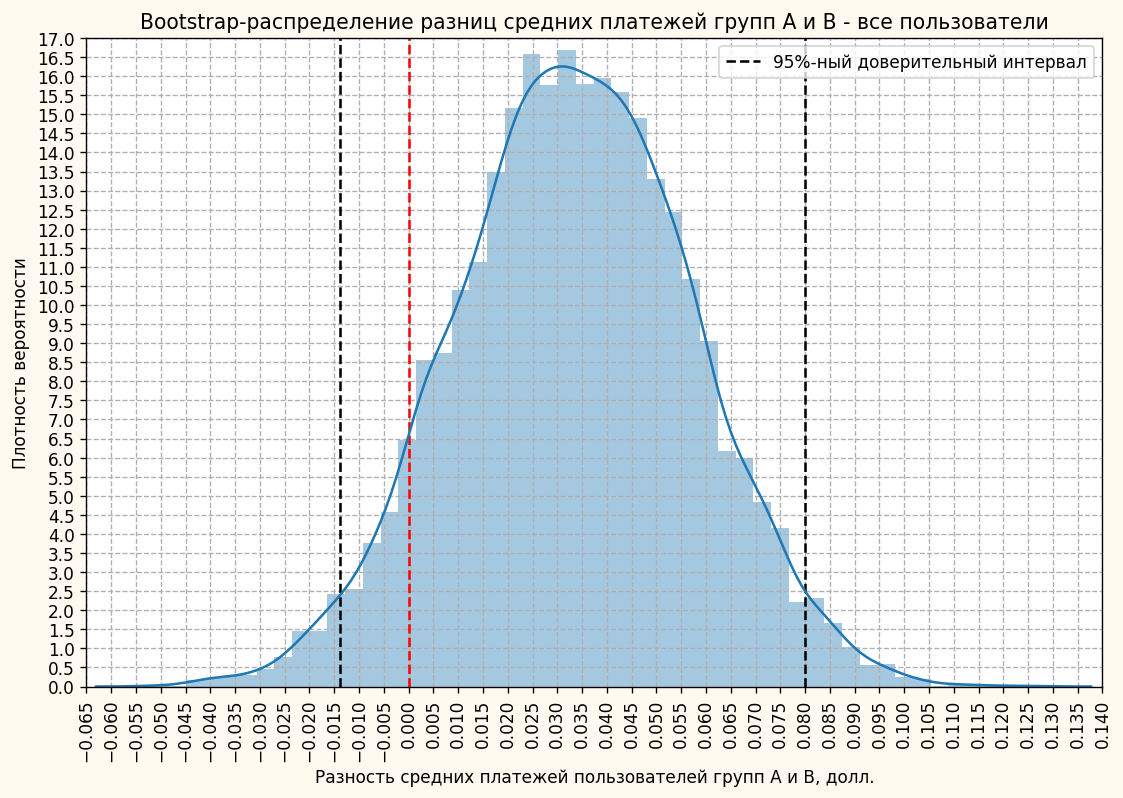

In [63]:
my_dpi = 122 # Задайте DPI вашего монитора. 

plt.figure(figsize = (1311/my_dpi, 859/my_dpi), 
           dpi = my_dpi, 
           facecolor  = 'floralwhite') 

sns.distplot(boot_results_mean) 

plt.title('Bootstrap-распределение разниц средних платежей групп A и B - все пользователи')
plt.xlabel('Разность средних платежей пользователей групп A и B, долл.') 
plt.ylabel('Плотность вероятности') 

plt.vlines(0, 
           ymin = 0, 
           ymax = 18, 
           linestyles= '--', 
           colors = 'red')

plt.vlines(borders_meandiff_95, 
           ymin = 0, 
           ymax = 18, 
           linestyles= '--', 
           colors = 'black', 
           label = '95%-ный доверительный интервал')

plt.legend()

plt.grid(linestyle = 'dashed', 
         linewidth = 0.8) 

plt.ylim((0, 17))
plt.xlim((-0.065, 0.140))

plt.yticks(np.arange(0, 17.1, step = 0.5)) 
plt.xticks(np.arange(-0.065, 0.141, step = 0.005), 
           rotation = 90) 

plt.savefig('Bootstrap_meandiff.png', dpi = my_dpi) # Сохраняем рисунок в размере 1311 пунктов на 859 пунктов.
plt.savefig('Bootstrap_meandiff_big.png', dpi = my_dpi * 5) # На всякий случай сохраняем рисунок в пятикратном размере.

plt.show()

На представленном графике видно, что ноль входит в 95%-ный доверительный интервал разности средних платежей пользователей в контрольной и тестовой группах и находится ближе к его нижней границе. 

#### 5.1.3. Расчет экономического эффекта. 

Расчет экономического эффекта, исходя из условных 5 000 000 открытий страницы с перечнем доступных платежных систем (open-list), приведен ниже (при уровне статистической значимости альфа 0,05). 

В формуле в обоих частях разности используется amount_average['amount_average'].values[0], поскольку средние платежи пользователей в группах A и B в действительности равны. 

In [64]:
# Задаем условное количество открытий страницы с перечнем доступных платежных систем open_list_count 
# для расчета изменения выручки компании:

open_list_count = 5000000 

revenue_change = open_list_count * conversion3['conversion3'].values[1] * amount_average['amount_average'].values[0]-\
                 open_list_count * conversion3['conversion3'].values[0] * amount_average['amount_average'].values[0] 

round(revenue_change)

-194162

Таким образом, экономический эффект, исходя из условных 5 000 000 открытий страницы с перечнем доступных платежных систем (open-list), будет отрицательным в размере минус 194,162 тыс. долл. То есть в случае раскатки теста выручка компании сократится на **194,162 тыс. долл.**, исходя из условных 5 000 000 открытий страницы с перечнем доступных платежных систем (при прочих равных условиях). 

Следовательно, на данном этапе добавление новой платежной системы для всей аудитории выглядит **нецелесообразным**. 

Далее посмотрим на показатели конверсий Conversion1 и Conversion2. 

#### 5.1.4. Сравнение средних показателей конверсии Conversion1. 

Рассчитаем показатель конверсии Conversion1 (т.е. конверсию из пользователей, открывших страницу с перечнем доступных платежных систем (open-list), в пользователей, выбравших платежную систему из множества платежных систем (open-payment)) в разрезе групп A и B. 

In [65]:
conversion1 = df.groupby('experiment_group', as_index = False).agg({'open_list': 'sum', 
                                                                    'open_payment': 'sum'})

conversion1['conversion1'] = round(conversion1['open_payment'] / conversion1['open_list'], 3)

conversion1

,experiment_group,open_list,open_payment,conversion1
0,A,197759,169173,0.855
1,B,196614,169989,0.865


In [66]:
chi2stat_C1, pval_C1, table_C1 = proportion.proportions_chisquare(conversion1['open_payment'], 
                                                                  conversion1['open_list'])

In [67]:
pval_C1

1.4107459671214393e-16

Показатель конверсии Conversion1 в тестовой группе (86,5%) статистически значимо **превышает** показатель конверсии Conversion1 в контрольной группе (85,5%). То есть разница между ними в размере 1 процентный пункт является статистически значимой. 

А значит нам нужно разбираться, почему пользователи, судя по всему, интересуются новой платежной системой, выбирают ее из множества платежных систем, но дальше по каким-то причинам не оформляют в ней заявки на оплату. Возможно, здесь поможет анализ продолжительности времени самих событий open-payment для новой платежной системы. 

В целом нужно проанализировать поведение игроков с помощью Customer Journey Map (CJM), чтобы найти ключ к решению указанной проблемы. 

#### 5.1.5. Сравнение средних показателей конверсии Conversion2.

Рассчитаем показатель конверсии Conversion2 (т.е. конверсию из пользователей, выбравших платежную систему из множества платежных систем (open-payment), в пользователей, создавших заявку на оплату (create-invoice)) в разрезе групп A и B. 

In [71]:
conversion2 = df.groupby('experiment_group', as_index = False).agg({'open_payment': 'sum', 
                                                                    'create_invoice': 'sum'})

conversion2['conversion2'] = round(conversion2['create_invoice'] / conversion2['open_payment'], 3)

conversion2

,experiment_group,open_payment,create_invoice,conversion2
0,A,169173,67516,0.399
1,B,169989,66385,0.391


In [72]:
chi2stat_C2, pval_C2, table_C2 = proportion.proportions_chisquare(conversion2['create_invoice'], 
                                                                  conversion2['open_payment'])

In [73]:
pval_C2

3.312813699597659e-07

Показатель конверсии Conversion2 в тестовой группе (39,1%) статистически значимо **меньше** показателя конверсии Conversion2 в контрольной группе (39,9%). То есть разница между ними в размере 0,8 процентного пункта является статистически значимой. 

Очевидно, что проблему ухудшения показателя конверсии Conversion2 нужно как-то решать, чтобы показатель конверсии Conversion2 в тестовой группе остался, как минимум, на уровне показателя конверсии Conversion2 в контрольной группе (39,9%). 

В этом случае прирост выручки компании с учетом увеличения показателя конверсии Conversion1 с 85,5% до 86,5% при условных 5 000 000 открытий страницы с перечнем доступных платежных систем (open-list) и неизменном среднем платеже пользователей в размере 12,9 долл. можно рассчитать следующим образом. 

In [77]:
# Задаем условное количество открытий страницы с перечнем доступных платежных систем open_list_count 
# для расчета изменения выручки компании:

open_list_count = 5000000 

revenue_change_C1 = open_list_count * conversion1['conversion1'].values[1] * conversion2['conversion2'].values[0] * amount_average['amount_average'].values[0] -\
                    open_list_count * conversion1['conversion1'].values[0] * conversion2['conversion2'].values[0] * amount_average['amount_average'].values[0] 

round(revenue_change_C1) 

258236

Таким образом, в этом случае выручка компании увеличится, как минимум, на **258,236 тыс. долл.** в абсолютном выражении (при прочих равных условиях). 

#### 5.1.6. Графический анализ почасовой динамики средних показателей конверсий. 

Посмотрим на графики почасовой динамики средних показателей конверсий Conversion1, Conversion2 и Conversion3 в разрезе контрольной и тестовой групп. 

In [78]:
df_A_byhours = df.loc[df['experiment_group'] == 'A'].resample('H', on = 'internal_time')\
                     [['open_list', 'open_payment', 'create_invoice']].sum().reset_index()

df_A_byhours.columns = ['internal_time', 'open_list_A', 'open_payment_A', 'create_invoice_A']

df_A_byhours['conversion1_A'] = round(df_A_byhours['open_payment_A'] / df_A_byhours['open_list_A'] * 100, 1) 

df_A_byhours['conversion2_A'] = round(df_A_byhours['create_invoice_A'] / df_A_byhours['open_payment_A'] * 100, 1) 

df_A_byhours['conversion3_A'] = round(df_A_byhours['create_invoice_A'] / df_A_byhours['open_list_A'] * 100, 1) 

df_A_byhours 

,internal_time,open_list_A,open_payment_A,create_invoice_A,conversion1_A,conversion2_A,conversion3_A
0,2021-12-10 12:00:00,216,189,87,87.5,46.0,40.3
1,2021-12-10 13:00:00,527,459,221,87.1,48.1,41.9
2,2021-12-10 14:00:00,638,532,248,83.4,46.6,38.9
3,2021-12-10 15:00:00,751,624,286,83.1,45.8,38.1
4,2021-12-10 16:00:00,745,629,276,84.4,43.9,37.0
...,...,...,...,...,...,...,...
343,2021-12-24 19:00:00,0,0,0,NaN,NaN,NaN
344,2021-12-24 20:00:00,0,0,0,NaN,NaN,NaN
345,2021-12-24 21:00:00,0,0,0,NaN,NaN,NaN
346,2021-12-24 22:00:00,0,0,0,NaN,NaN,NaN


In [79]:
df_B_byhours = df.loc[df['experiment_group'] == 'B'].resample('H', on = 'internal_time')\
                     [['open_list', 'open_payment', 'create_invoice']].sum().reset_index()

df_B_byhours.columns = ['internal_time', 'open_list_B', 'open_payment_B', 'create_invoice_B']

df_B_byhours['conversion1_B'] = round(df_B_byhours['open_payment_B'] / df_B_byhours['open_list_B'] * 100, 1) 

df_B_byhours['conversion2_B'] = round(df_B_byhours['create_invoice_B'] / df_B_byhours['open_payment_B'] * 100, 1) 

df_B_byhours['conversion3_B'] = round(df_B_byhours['create_invoice_B'] / df_B_byhours['open_list_B'] * 100, 1) 

df_B_byhours 

,internal_time,open_list_B,open_payment_B,create_invoice_B,conversion1_B,conversion2_B,conversion3_B
0,2021-12-10 12:00:00,242,217,91,89.7,41.9,37.6
1,2021-12-10 13:00:00,539,452,174,83.9,38.5,32.3
2,2021-12-10 14:00:00,596,499,213,83.7,42.7,35.7
3,2021-12-10 15:00:00,741,620,287,83.7,46.3,38.7
4,2021-12-10 16:00:00,720,609,266,84.6,43.7,36.9
...,...,...,...,...,...,...,...
337,2021-12-24 13:00:00,0,0,0,NaN,NaN,NaN
338,2021-12-24 14:00:00,0,0,0,NaN,NaN,NaN
339,2021-12-24 15:00:00,0,0,0,NaN,NaN,NaN
340,2021-12-24 16:00:00,0,0,0,NaN,NaN,NaN


In [80]:
df_AB_byhours = pd.merge(df_A_byhours, 
                         df_B_byhours, 
                         how = 'inner', 
                         left_on = 'internal_time', 
                         right_on = 'internal_time') 

df_AB_byhours = df_AB_byhours.dropna()

df_AB_byhours

,internal_time,open_list_A,open_payment_A,create_invoice_A,conversion1_A,conversion2_A,conversion3_A,open_list_B,open_payment_B,create_invoice_B,conversion1_B,conversion2_B,conversion3_B
0,2021-12-10 12:00:00,216,189,87,87.5,46.0,40.3,242,217,91,89.7,41.9,37.6
1,2021-12-10 13:00:00,527,459,221,87.1,48.1,41.9,539,452,174,83.9,38.5,32.3
2,2021-12-10 14:00:00,638,532,248,83.4,46.6,38.9,596,499,213,83.7,42.7,35.7
3,2021-12-10 15:00:00,751,624,286,83.1,45.8,38.1,741,620,287,83.7,46.3,38.7
4,2021-12-10 16:00:00,745,629,276,84.4,43.9,37.0,720,609,266,84.6,43.7,36.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2021-12-24 06:00:00,353,288,113,81.6,39.2,32.0,468,380,145,81.2,38.2,31.0
331,2021-12-24 07:00:00,405,330,168,81.5,50.9,41.5,436,361,187,82.8,51.8,42.9
332,2021-12-24 08:00:00,412,337,164,81.8,48.7,39.8,415,340,147,81.9,43.2,35.4
333,2021-12-24 09:00:00,498,407,210,81.7,51.6,42.2,508,432,228,85.0,52.8,44.9


Посмотрим на почасовую динамику средних показателей конверсии Conversion1 в разрезе контрольной и тестовой групп на протяжении нашего эксперимента (контрольная группа A обозначена синим цветом, тестовая группа B - красным цветом). 

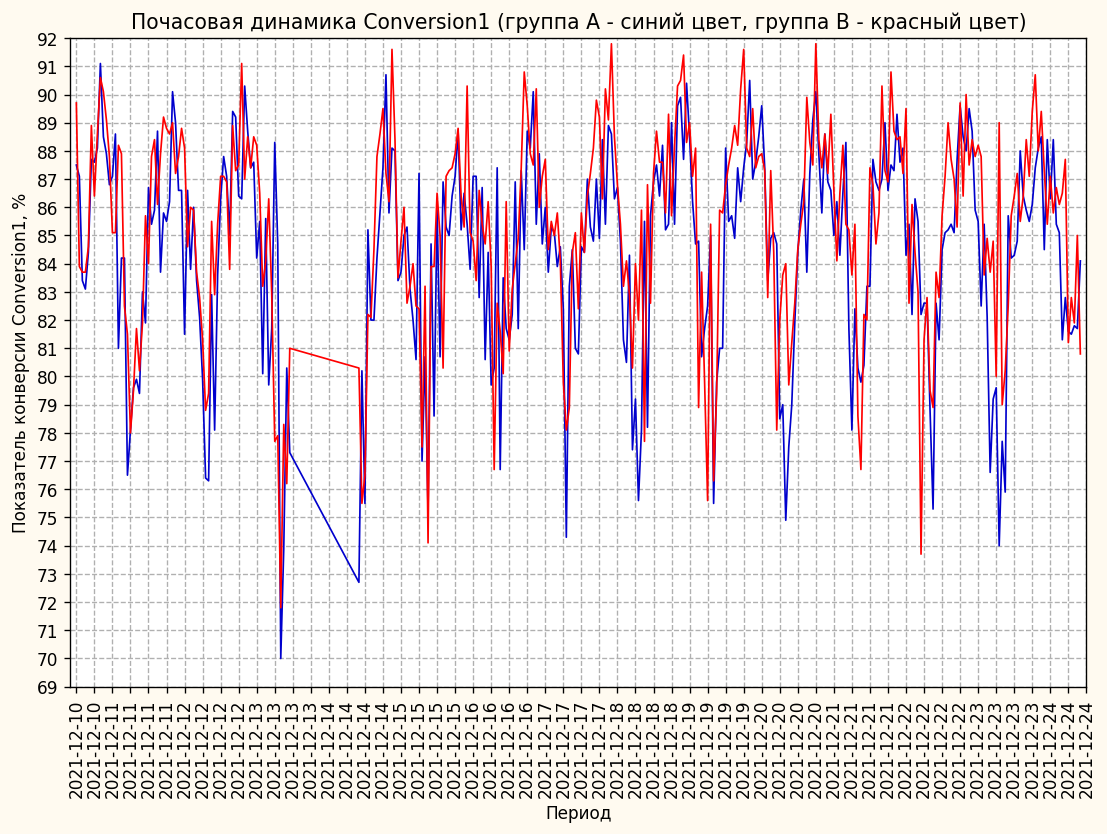

In [81]:
my_dpi = 122 # Задайте DPI вашего монитора. 

plt.figure(figsize = (1311/my_dpi, 859/my_dpi), dpi = my_dpi, 
           facecolor  = 'floralwhite') 

plt.title('Почасовая динамика Conversion1 (группа A - синий цвет, группа B - красный цвет)') 
plt.xlabel('Период') 
plt.ylabel('Показатель конверсии Conversion1, %') 

plt.grid(linestyle = 'dashed', linewidth = 0.8) 
 
plt.plot(df_AB_byhours['internal_time'], 
         df_AB_byhours['conversion1_A'],
         linewidth = 1, 
         color = 'mediumblue') 

plt.plot(df_AB_byhours['internal_time'], 
         df_AB_byhours['conversion1_B'],
         linewidth = 1, 
         color = 'red') 

plt.xlim(datetime.datetime(2021, 12, 10, 10, 0, 0), datetime.datetime(2021, 12, 24, 12, 0, 0)) 

plt.ylim((69, 92)) 

plt.xticks(pd.date_range(start = '2021-12-10 12:00:00', end = '2021-12-24 12:00:00', freq = '6H'), 
           rotation = 90) 

plt.yticks(np.arange(69, 92.1, step = 1)) 

plt.savefig('Conversion1_byhours.png', dpi = my_dpi) 
plt.savefig('Conversion1_byhours_big.png', dpi = my_dpi * 5) 

plt.show() 

Обращает на себя внимание странный отрезок 13-14 декабря, на протяжении которого показатель конверсии Conversion1 в тестовой группе (красный цвет) заметно превышает показатель конверсии Conversion1 в контрольной группе (синий цвет). 

Возможно, это какая-то ошибка. Тем более, что этот отрезок графика существенно отличается от всего остального графика. 

Если же это не ошибка, то этот отрезок внес значительный вклад в то, что средний показатель конверсии Conversion1 в тестовой группе (86,5%) статистически значимо превышает средний показатель конверсии Conversion1 в контрольной группе (85,5%). Не исключено, что без этого отрезка статистически значимое различие между показателями не было бы выявлено (либо было бы выявлено, но в меньшем размере). 

Далее посмотрим на почасовую динамику средних показателей конверсии Conversion2 в разрезе контрольной и тестовой групп на протяжении нашего эксперимента (контрольная группа A обозначена синим цветом, тестовая группа B - красным цветом). 

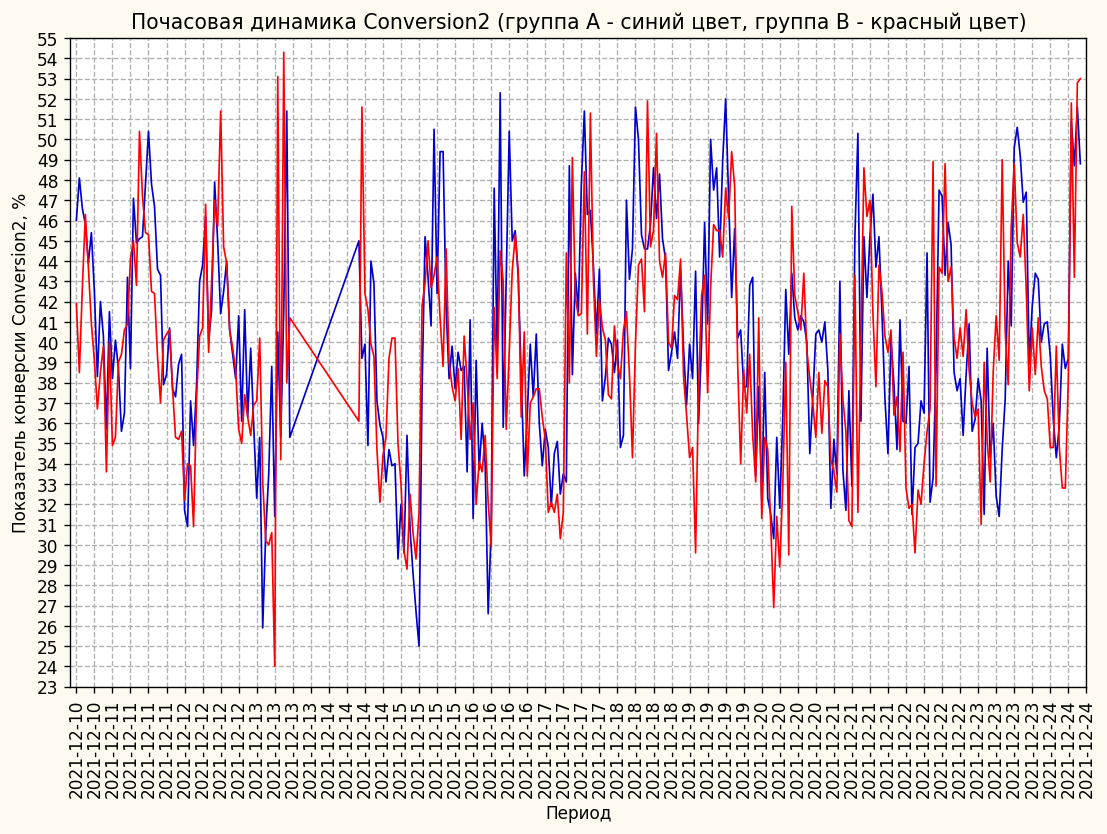

In [82]:
my_dpi = 122 

plt.figure(figsize = (1311/my_dpi, 859/my_dpi), dpi = my_dpi, 
           facecolor  = 'floralwhite') 

plt.title('Почасовая динамика Conversion2 (группа A - синий цвет, группа B - красный цвет)') 
plt.xlabel('Период') 
plt.ylabel('Показатель конверсии Conversion2, %') 

plt.grid(linestyle = 'dashed', linewidth = 0.8) 
 
plt.plot(df_AB_byhours['internal_time'], 
         df_AB_byhours['conversion2_A'],
         linewidth = 1, 
         color = 'mediumblue') 

plt.plot(df_AB_byhours['internal_time'], 
         df_AB_byhours['conversion2_B'],
         linewidth = 1, 
         color = 'red') 

plt.xlim(datetime.datetime(2021, 12, 10, 10, 0, 0), datetime.datetime(2021, 12, 24, 12, 0, 0)) 

plt.ylim((23, 55)) 

plt.xticks(pd.date_range(start = '2021-12-10 12:00:00', end = '2021-12-24 12:00:00', freq = '6H'), 
           rotation = 90) 

plt.yticks(np.arange(23, 55.1, step = 1)) 

plt.savefig('Conversion2_byhours.png', dpi = my_dpi) 
plt.savefig('Conversion2_byhours_big.png', dpi = my_dpi * 5) 

plt.show() 

Здесь также виден проблемный отрезок 13-14 декабря, который мог повлиять на анализ результатов A/B тестирования. 

Средний показатель конверсии Conversion2 в тестовой группе (39,1%) статистически значимо меньше среднего показателя конверсии Conversion2 в контрольной группе (39,9%). 

Однако не исключено, что без этого проблемного отрезка статистически значимая разница между показателями была бы меньше. 

Наконец, посмотрим на почасовую динамику средних показателей конверсии Conversion3 в разрезе контрольной и тестовой групп на протяжении нашего эксперимента (контрольная группа A обозначена синим цветом, тестовая группа B - красным цветом). 

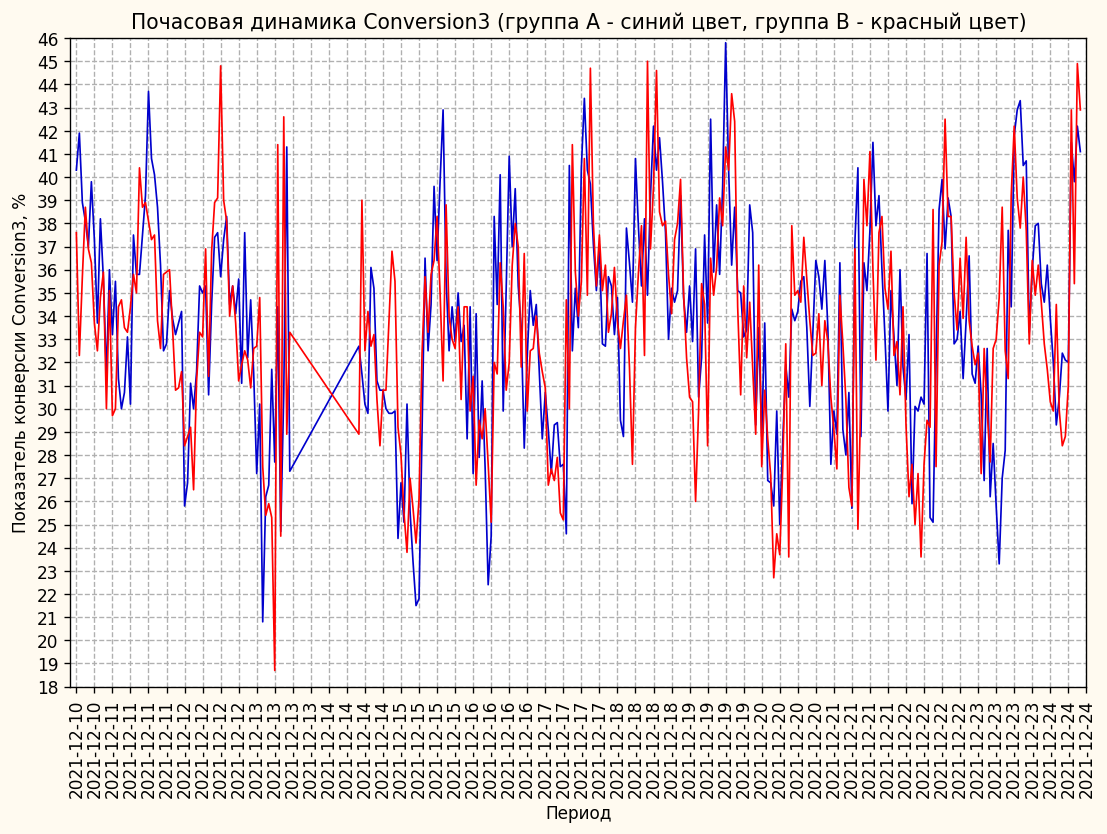

In [83]:
my_dpi = 122 

plt.figure(figsize = (1311/my_dpi, 859/my_dpi), dpi = my_dpi, 
           facecolor  = 'floralwhite') 

plt.title('Почасовая динамика Conversion3 (группа A - синий цвет, группа B - красный цвет)') 
plt.xlabel('Период') 
plt.ylabel('Показатель конверсии Conversion3, %') 

plt.grid(linestyle = 'dashed', linewidth = 0.8) 
 
plt.plot(df_AB_byhours['internal_time'], 
         df_AB_byhours['conversion3_A'],
         linewidth = 1, 
         color = 'mediumblue') 

plt.plot(df_AB_byhours['internal_time'], 
         df_AB_byhours['conversion3_B'],
         linewidth = 1, 
         color = 'red') 

plt.xlim(datetime.datetime(2021, 12, 10, 10, 0, 0), datetime.datetime(2021, 12, 24, 12, 0, 0)) 

plt.ylim((18, 46)) 

plt.xticks(pd.date_range(start = '2021-12-10 12:00:00', end = '2021-12-24 12:00:00', freq = '6H'), 
           rotation = 90) 

plt.yticks(np.arange(18, 46.1, step = 1)) 

plt.savefig('Conversion3_byhours.png', dpi = my_dpi) 
plt.savefig('Conversion3_byhours_big.png', dpi = my_dpi * 5) 

plt.show() 

Здесь также виден проблемный отрезок 13-14 декабря, который мог повлиять на анализ результатов A/B тестирования. 

Средний показатель конверсии Conversion3 в контрольной группе (34,1%) статистически значимо превышает средний показатель конверсии Conversion3 в тестовой группе (33,8%). 

Однако не исключено, что без этого проблемного отрезка статистически значимое различие между показателями не было бы выявлено (либо было бы выявлено, но в другом размере). 

### 5.2. Пользователи по сегментам. 

Разумеется, можно дополнительно проанализировать результаты A/B тестирования в разрезе платформ и стран. 

Например, можно выделить следующие уровни анализа: 

1. Только компьютерные пользователи; 

2. Только мобильные пользователи; 

3. Только пользователи из одной какой-либо страны; 

4. Только компьютерные пользователи из одной какой-либо страны; 

5. Только мобильные пользователи из одной какой-либо страны; 

Такой анализ результататов A/B тестирования даст дополнительную пищу для размышлений. 

## 6. Выводы. 

По результатам проведенного анализа можно сделать следующие выводы. 

**1)** На данном этапе раскатывать добавление новой платежной системы для всех игроков **нецелесообразно** ввиду наличия отрицательного экономического эффекта. 

**2)** Добавление новой платежной системы привело к статистически значимому ухудшению показателя конверсии Conversion3 (т.е. конверсии из пользователей, открывших лист с различными платежными системами, в пользователей, создавших заявку на оплату). Так, показатель конверсии Conversion3 снизился с 34,1% в контрольной группе до 33,8% в тестовой группе. 

**3)** Вместе с тем, добавление новой платежной системы позволило статистически значимо увеличить показатель конверсии Conversion1 (т.е. конверсию из пользователей, открывших лист с различными платежными системами, в пользователей, выбравших платежную систему из множества платежных систем). В частности, показатель конверсии Conversion1 повысился с 85,5% в контрольной группе до 86,5% в тестовой группе. 

**4)** При этом добавление новой платежной системы привело к статистически значимому ухудшению показателя конверсии Conversion2 (т.е. конверсии из пользователей, выбравших платежную систему из множества платежных систем, в пользователей, создавших заявку на оплату). Так, показатель конверсии Conversion2 снизился с 39,9% в контрольной группе до 39,1% в тестовой группе. 

Таким образом, нужно разбираться, почему пользователи, судя по всему, интересуются новой платежной системой, выбирают ее из множества платежных систем, но дальше по каким-то причинам не оформляют в ней заявки на оплату. 

В случае, если показатель конверсии Conversion2 в тестовой группе останется, как минимум, на уровне показателя конверсии Conversion2 в контрольной группе (39,9%), то прирост выручки компании с учетом увеличения показателя конверсии Conversion1 с 85,5% до 86,5% при условных 5 000 000 открытий страницы с перечнем доступных платежных систем и неизменном среднем платеже пользователей в размере 12,9 долл. составит не менее **258,236 тыс. долл.** в абсолютном выражении (при прочих равных условиях). 

**5)** Добавление новой платежной системы не оказывает статистически значимого положительного влияния на средний платеж пользователей, т.е. этот показатель не изменился. 

**6)** В идеале было бы здорово провести новый A/B тест с изменением системы сбора исходных данных таким образом, чтобы каждое последующее событие регистрировалось строго за предшествующим ему событием в рамках цепочки open-list - open-payment - create-invoice. То есть, например, у одного и того же пользователя второй open-list должен отражаться строго после первого create-invoice независимо от того, сколько раз пользователь откроет страницу с перечнем доступных платежных систем (до формирования первой заявки на оплату). 

После этого нужно будет проверить наличие зависимости между показателем конверсии Conversion3 и количеством открытий страницы с перечнем доступных платежных систем (open-list) в разрезе пользователей. Наличие связи между этими показателями может существенно повлиять на ход дальнейшего анализа результатов A/B тестирования. 

## 7. Перспективы дальнейших исследований.

### 7.1. Учет внутрипользовательских корреляций. 

Необходимо учитывать, что один и тот же пользователь может совершить сразу несколько открытий страницы с различными платежными системами, несколько выборов платежной системы из множества платежных систем и несколько заявок на оплату. 

В данном случае возникает проблема, связанная с необходимостью учета внутрипользовательских корреляций. При этом индивидуальные показатели конверсий отдельных игроков и их веса внутри своих групп (контрольной и тестовой) могут существенно различаться. 

Для возможного решения указанной проблемы можно попробовать использовать такие методы, как бакетные преобразования, перевзвешивание пользователей, пуассоновский бутстрэп, вайлд бутстрэп и др. 

### 7.2. Ускорение А/B тестирования за счет сокращения дисперсии. 

С точки зрения ускорения А/B тестирования и увеличения чувствительности A/B тестов целесообразным выглядит использование методов, позволяющих сократить дисперсию, – стратификация, CUPED (Controlled-experiment Using Pre-Experiment Data), последовательная проверка статистических гипотез (sequential hypothesis testing) и др. 

### 7.3. Байесовское A/B тестирование. 

Для получения дополнительной информации вкупе с возможностью оптимизировать эксперименты можно попробовать использовать байесовские A/B тесты. 

### 7.4. Машинное обучение моделей логистической регрессии. 

Дополнительным аналитическим инструментом может быть машинное обучение моделей логистической регрессии. 

В данном случае в рамках модели логистической регрессии можно посмотреть, будет ли оказывать статистически значимое влияние наша фиктивная переменная (1 – игрокам показывается новая платежная система, 0 – нет) на соответствующую результативную переменную (1 – игрок «конвертнулся», 0 – нет) с учетом имеющегося системного эффекта, связанного с совместным перекрестным влиянием остальных факторных признаков на результативный признак. 

Но здесь скорее будет интересно взглянуть на то, какие факторы, включенные в модель логистической регрессии, будут оказывать существенное влияние на вероятность того, «конвертнется» ли пользователь. И, соответственно, дальше нужно посмотреть, а можем ли мы как-то улучшить эти факторы с тем, чтобы, в конечном счете, увеличить наши показатели конверсий. 

В качестве возможных факторных признаков для включения в модель логистической регрессии можно выбрать (включая фиктивные переменные): 

1. Страна игрока. 

2. Тип населенного пункта игрока. 

3. Платформа. 

4. Выбранная платежная система (для показателей конверсий Conversion2 и Conversion3). 

5. Игра. 

6. Игровые действия. 

7. Источники трафика. 

8. Когорты игроков. 

9. Пол игрока. 

10. Возраст игрока. 

11. Используемый браузер. 

12. Используемая операционная система. 

13. Скидки и акции в игре. 

14. Знак зодиака (?!) игрока:). 